## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(\omega, \theta)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que quedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

#Solución punto 1

In [4]:
from scipy.integrate import odeint
from IPython.display import Math
import numpy as np
import pylab as plt

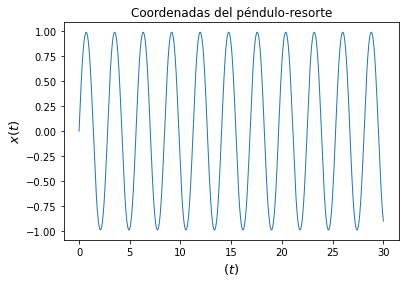

In [127]:
# definición de la función que da las derivadas de los parámetros por hallar
def du_dt(u0,t,L0=1,k=1,m=0.2):
    v,x = u0
    dudt = [- k/m*x, v]
    return dudt

# definición de constantes
n = 1000   
L0 = 1.55            # longitud en reposo [m]
k = 1           # constante elástica [N/m]
m = 0.2           # masa [kg]
u0 = [L0,0]  # condiciones iniciales de L,v

t = np.linspace(0,30,n)

# solución de las ecuaciones diferenciales: L,v
u = odeint(du_dt,u0,t,args=(L0,k,m))

# coordenada x del movimiento
x = L0*np.sin(u[:,1])

# gráfico de las coordenadas
plt.plot(t,x,lw=1)
plt.title('Coordenadas del péndulo-resorte')
plt.xlabel('$(t)$',size=13)
plt.ylabel('$x(t)$',size=13)
#plt.grid()
plt.show()

#Espacio de configuraciones

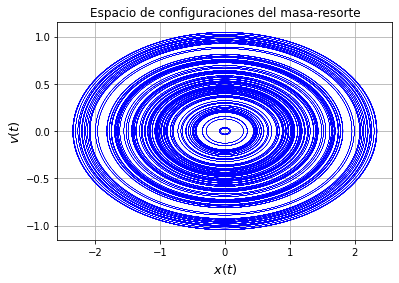

In [144]:
# definición de condiciones iniciales aleatorias
n = 100
Lp = np.random.uniform(0,1,n)
vp = np.random.uniform(-1,1,n)

t = np.linspace(0,30,10000)

# cálculo de L,v en las distintas condiciones iniciales
for L,v in zip(Lp,vp):
    u0 = [L,v]
    u = odeint(du_dt,u0,t,args=(L0,k,m))
    plt.plot(u[:,0],u[:,1],c='b',lw=0.1)
    plt.title('Espacio de configuraciones del masa-resorte')
plt.xlabel('$x(t)$',size=13)
plt.ylabel('$v(t)$',size=13)
plt.grid()
plt.show()

#Solución punto 2

In [222]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

In [218]:
#df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json')

In [ ]:
#df

In [202]:
#τ =26
#λ = np.log(2)/τ

In [ ]:
#def N(t, N_0=1000):
 # return N_0*np.exp(-λ*t)

In [267]:
df = pd.DataFrame( {'t': [ 0,  10,  22,  33,  40, 50, 60, 70, 80, 90, 111, 110, 133, 130, 140, 166, 177, 170, 199, 200],
                  'N': [1000, 809, 564, 480, 370, 285, 199, 169, 131, 101, 70, 54, 42, 32, 25, 21, 16, 13, 9, 7]} )
df[['t','N']]

,t,N
0,0,1000
1,10,809
2,22,564
3,33,480
4,40,370
5,50,285
6,60,199
7,70,169
8,80,131
9,90,101


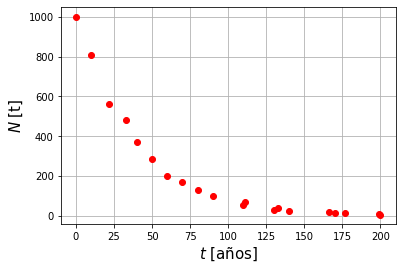

In [268]:
plt.plot(df.t,df.N,'ro')
plt.xlabel('$t$ [años]',size=15 )
plt.ylabel('$N$ [t]',size=15 )
plt.grid()

In [338]:
def f(T, λ):
  N_0=1000
  return N_0*np.exp(-1*λ*T)

#fit
T = np.linspace(0, 200, 100)
a, Δa = optimize.curve_fit(f, df.t, df.N)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [339]:
a

array([0.02487957])

In [340]:
τ = 27.86009115
τ = np.log(2)/a

In [341]:
λ = np.log(2)/τ

In [342]:
λ

array([0.02487957])

In [343]:
τ

array([27.86009115])

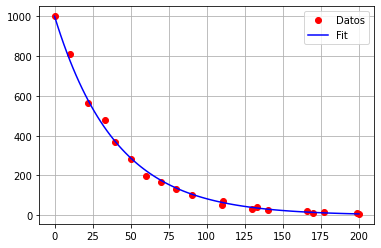

In [349]:
plt.plot(df.t, df.N, 'ro', label = 'Datos')
plt.plot(T, f(T, λ), 'b-', label = 'Fit')
plt.legend()
plt.grid()